In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [23]:
bank_data = pd.read_csv('bank-additional-full.csv')

#Handling categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome', 'y']
bank_data_tran = pd.get_dummies(bank_data, columns = categorical_features, drop_first=True)

#because of the high correlation coefficient between euribor3m rate and nr. of employed, the latter is going to be dropped
bank_data_tran.drop(['nr.employed'], axis = 1, inplace = True)

#apllying the same logic, emp.var.rate is going to be dropped
bank_data_tran.drop(['emp.var.rate'], axis = 1, inplace = True)

In [24]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(bank_data_tran.values)

In [25]:
pca = PCA(n_components = 2)

In [26]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
x_pca = pca.transform(x)

In [28]:
x.shape

(41188, 52)

In [29]:
x_pca.shape

(41188, 2)

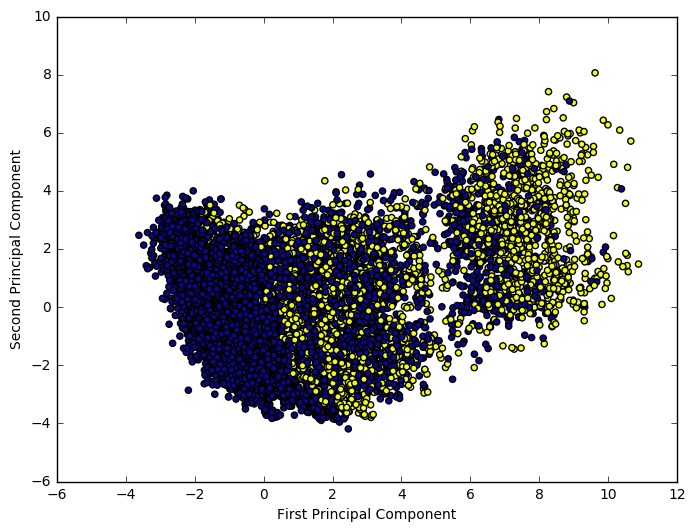

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:, 0], x_pca [:, 1], c = bank_data_tran['y_yes'], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [31]:
df_comp = pd.DataFrame(pca.components_, columns = bank_data_tran.columns)

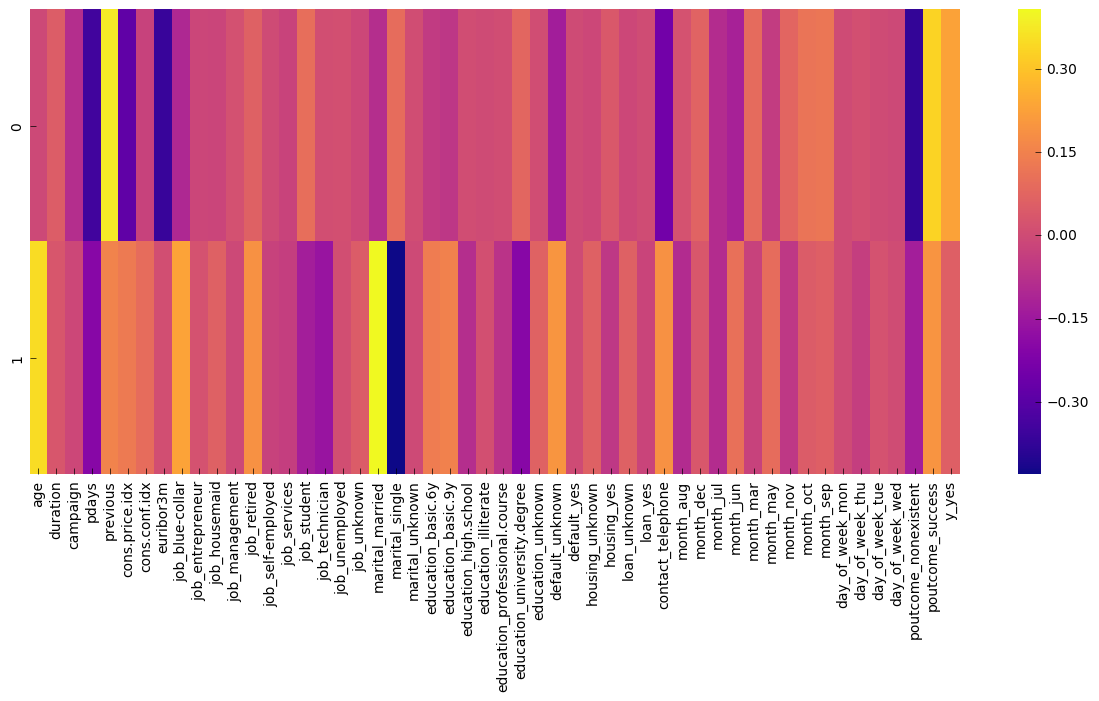

In [34]:
plt.figure(figsize = (15,6))
sns.heatmap(df_comp, cmap = 'plasma')